In [93]:
#Prabhat Thakur Date 05/18/2019
#2019SP_MSDS_458-DL_SEC56 Week7- Assignment3
#Create deep neural networks for language processing and to analyze various factors.
#Data : IMDB dataset - Classifying movie reviews: a binary classification example
#Code Addopted from F. Challot (2018), Deep Learning with Python (Manning)

import random
import numpy as np
import pandas as pd

import keras
from keras.datasets import imdb
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Embedding
from keras.layers import Conv2D, MaxPooling2D,SimpleRNN,LSTM,Conv1D,MaxPooling1D,GlobalMaxPooling1D
from keras import preprocessing

import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

In [77]:
def welcome ():
    print (' ' )
    print ('******************************************************************************')
    print (' ' )
    print ('This program examins natural language processing using different')
    print ('deep learning neural network structures. ')
    print ('Dataset used for Study: IMDB Movie review text.')
    print ('Classifying movie reviews: a binary classification example')
    print (' ' )
    print ('******************************************************************************')
    print (' ' )
    return()

In [78]:
def OneHot_Encoding(sequences,dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.  # set specific indices of results[i] to 1s         
    return results

In [79]:
def plot_loss (history):
    history_dict = history.history
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [80]:
def plot_accuracy (history):
    history_dict = history.history
    
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    plt.clf()
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [96]:
class IMDBDeepModels:
    """Defines different Deep Learning models for sentiment-classification of IMDB movie review dataset. """

    def __init__(self, input_shape=(10000,),maxlen = 500):
        """Defines IMDB inputs and outputs"""
        self.input_shape = input_shape
        self.model = None
        self.maxlen = maxlen
        (self.x_train_onehot,self.x_train_wem, self.y_train) = (None, None,None)
        (self.x_test_onehot,self.x_test_wem, self.y_test) = (None, None, None)
    
    
    def load_data(self):
        """Load IMDB Moive review data"""

        print("Loading IMDB review Data\n")

        # Load data
        (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
               
        # word_index is a dictionary mapping words to an integer index
        word_index = imdb.get_word_index()
        # We reverse it, mapping integer indices to words
        reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
        # We decode the review; note that our indices were offset by 3
        # because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
        decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
        print ("First movie review text:")
        print (decoded_review)
        
        # Our vectorized training data
        self.x_train_onehot = OneHot_Encoding(train_data)
        # Our vectorized test data
        self.x_test_onehot = OneHot_Encoding(test_data)

        #LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER
        
        self.x_train_wem = preprocessing.sequence.pad_sequences(train_data, maxlen=self.maxlen)
        self.x_test_wem = preprocessing.sequence.pad_sequences(test_data, maxlen=self.maxlen)
        
        # Our vectorized labels
        self.y_train = np.asarray(train_labels).astype('float32')
        self.y_test = np.asarray(test_labels).astype('float32')
        
        return self
    
    def DNNmodel1(self):
        """Deep Neural Network 1"""

        print ('\n******************************************************************************')
        print("Model1 - Deep Neural Network with 1 hidden layer, One-hot word encoding ")
        
        self.model = Sequential()
        self.model.add(Dense(16, activation='relu', input_shape=(10000,)))
        self.model.add(Dense(16, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))
        
        self.model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
        
        history = self.model.fit(self.x_train_onehot, self.y_train,
                    epochs=4,
                    batch_size=128,
                    validation_split=0.2)
        
        self.model.summary()
        self.model.save('1-IMDB_DNNmodel1.h5')
        
        plot_loss (history)
        plot_accuracy(history)
        
        score = self.model.evaluate(self.x_test_onehot, self.y_test)
    
        print(f"\nTest loss: {score[0]:.4f}")
        print(f"Test accuracy: {score[1]:.4f}")
        print ('******************************************************************************\n')
        return self

    def DNNmodel2(self):
        """Deep Neural Network 2"""

        print ('\n******************************************************************************')
        print("Model2 - Deep Neural Network with 1 hidden layer, LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER")
        
        self.model = Sequential()
        
        self.model.add(Embedding(10000, 32, input_length=self.maxlen))
        # After the Embedding layer, 
        # our activations have shape `(samples, maxlen, 8)`.

        # We flatten the 3D tensor of embeddings 
        # into a 2D tensor of shape `(samples, maxlen * 8)`
        self.model.add(Flatten())

        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(16, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))
        
        self.model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
        
        history = self.model.fit(self.x_train_wem, self.y_train,
                    epochs=4,
                    batch_size=128,
                    validation_split=0.2)
        
        self.model.summary()
        self.model.save('2-IMDB_DNNmodel2.h5')
        
        plot_loss (history)
        plot_accuracy(history)
        
        score = self.model.evaluate(self.x_test_wem, self.y_test)
    
        print(f"\nTest loss: {score[0]:.4f}")
        print(f"Test accuracy: {score[1]:.4f}")
        print ('******************************************************************************\n')
        return self
    
    def RNNmodel(self):
        """RNN Neural Network"""

        print ('\n******************************************************************************')
        print("Model3 - RNN layer, LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER")
        
        self.model = Sequential()
        
        self.model.add(Embedding(10000, 32, input_length=self.maxlen))
        self.model.add(SimpleRNN(32,return_sequences=True))
        self.model.add(SimpleRNN(32))
        self.model.add(Dense(1, activation='sigmoid'))
        
        self.model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
        
        history = self.model.fit(self.x_train_wem, self.y_train,
                    epochs=4,
                    batch_size=128,
                    validation_split=0.2)
        
        
        self.model.summary()
        self.model.save('3-IMDB_RNNmodel.h5')
        
        plot_loss (history)
        plot_accuracy(history)
        
        score = self.model.evaluate(self.x_test_wem, self.y_test)
    
        print(f"\nTest loss: {score[0]:.4f}")
        print(f"Test accuracy: {score[1]:.4f}")
        print ('******************************************************************************\n')
        return self
    

    def LSTMmodel(self):
        """LSTM Neural Network"""

        print ('\n******************************************************************************')
        print("Model4 - LSTM layer, LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER")
        
        self.model = Sequential()
        
        self.model.add(Embedding(10000, 32, input_length=self.maxlen))
        self.model.add(LSTM(32))
        
        self.model.add(Dense(1, activation='sigmoid'))
        
        self.model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
        
        history = self.model.fit(self.x_train_wem, self.y_train,
                    epochs= 5,
                    batch_size=128,
                    validation_split=0.2)
        
        self.model.summary()
        self.model.save('4-IMDB_LSTMmodel.h5')
        
        plot_loss (history)
        plot_accuracy(history)
        
        score = self.model.evaluate(self.x_test_wem, self.y_test)
    
        print(f"\nTest loss: {score[0]:.4f}")
        print(f"Test accuracy: {score[1]:.4f}")
        print ('******************************************************************************\n')
        return self
    
    def Conv1Dmodel(self):
        """CNN Conv1Dmodel"""

        print ('\n******************************************************************************')
        print("Model5 - Conv1D layer, LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER")
        
        self.model = Sequential()
        
        self.model.add(Embedding(10000, 128, input_length=self.maxlen))
        
        self.model.add(Conv1D(32, 7, activation='relu'))
        self.model.add(MaxPooling1D(5))
        self.model.add(Conv1D(32, 7, activation='relu'))
        self.model.add(GlobalMaxPooling1D())
        self.model.add(Dense(1))
        
        self.model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
        
        history = self.model.fit(self.x_train_wem, self.y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
        
        self.model.summary()
        self.model.save('5-IMDB_Conv1Dmodel.h5')
        
        plot_loss (history)
        plot_accuracy(history)
        
        score = self.model.evaluate(self.x_test_wem, self.y_test)
    
        print(f"\nTest loss: {score[0]:.4f}")
        print(f"Test accuracy: {score[1]:.4f}")
        print ('******************************************************************************\n')
        return self
 

 
******************************************************************************
 
This program examins natural language processing using different
deep learning neural network structures. 
Dataset used for Study: IMDB Movie review text.
Classifying movie reviews: a binary classification example
 
******************************************************************************
 
Loading IMDB review Data

First movie review text:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end

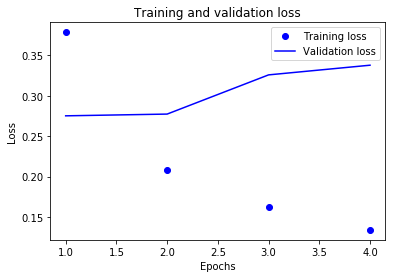

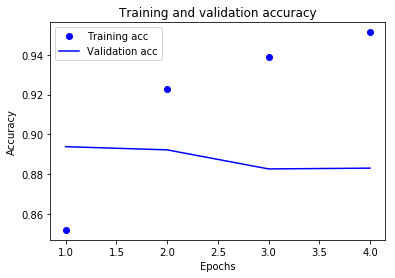

25000/25000 [==============================] - 15s 592us/step

Test loss: 0.3709
Test accuracy: 0.8694
******************************************************************************


******************************************************************************
Model2 - Deep Neural Network with 1 hidden layer, LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER
Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 13s 651us/step - loss: 0.5418 - acc: 0.6987 - val_loss: 0.3650 - val_acc: 0.8392
Epoch 2/4
20000/20000 [==============================] - 9s 426us/step - loss: 0.2391 - acc: 0.9052 - val_loss: 0.2890 - val_acc: 0.8768
Epoch 3/4
20000/20000 [==============================] - 8s 407us/step - loss: 0.1280 - acc: 0.9554 - val_loss: 0.3388 - val_acc: 0.8676
Epoch 4/4
20000/20000 [==============================] - 8s 403us/step - loss: 0.0512 - acc: 0.9849 - val_loss: 0.4362 - val_acc: 0.8670
_______________________________________

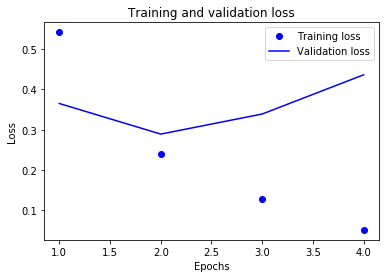

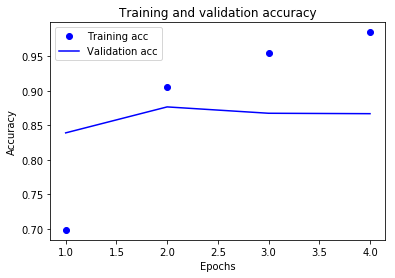

25000/25000 [==============================] - 5s 197us/step

Test loss: 0.4422
Test accuracy: 0.8556
******************************************************************************


******************************************************************************
Model3 - RNN layer, LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER
Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 62s 3ms/step - loss: 0.6127 - acc: 0.6444 - val_loss: 0.5260 - val_acc: 0.7464
Epoch 2/4
20000/20000 [==============================] - 60s 3ms/step - loss: 0.4023 - acc: 0.8222 - val_loss: 0.3889 - val_acc: 0.8294
Epoch 3/4
20000/20000 [==============================] - 59s 3ms/step - loss: 0.3067 - acc: 0.8736 - val_loss: 0.3835 - val_acc: 0.8338
Epoch 4/4
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2083 - acc: 0.9198 - val_loss: 0.4804 - val_acc: 0.7874
_________________________________________________________________
Layer (ty

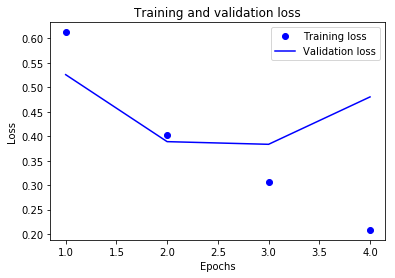

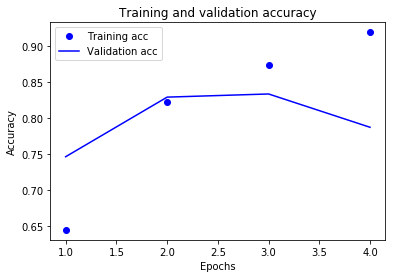

25000/25000 [==============================] - 50s 2ms/step

Test loss: 0.4775
Test accuracy: 0.7793
******************************************************************************


******************************************************************************
Model4 - LSTM layer, LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 118s 6ms/step - loss: 0.5157 - acc: 0.7467 - val_loss: 0.3464 - val_acc: 0.8620
Epoch 2/5
20000/20000 [==============================] - 117s 6ms/step - loss: 0.2988 - acc: 0.8836 - val_loss: 0.3181 - val_acc: 0.8682
Epoch 3/5
20000/20000 [==============================] - 124s 6ms/step - loss: 0.2279 - acc: 0.9130 - val_loss: 0.2724 - val_acc: 0.8946
Epoch 4/5
20000/20000 [==============================] - 127s 6ms/step - loss: 0.2014 - acc: 0.9242 - val_loss: 0.3501 - val_acc: 0.8848
Epoch 5/5
20000/20000 [==============================] - 152s 8ms/step 

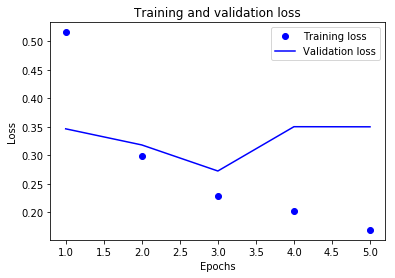

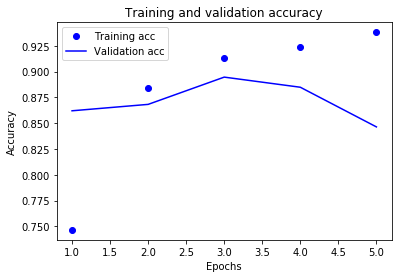

25000/25000 [==============================] - 81s 3ms/step

Test loss: 0.3589
Test accuracy: 0.8449
******************************************************************************


******************************************************************************
Model5 - Conv1D layer, LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 166s 8ms/step - loss: 8.0840 - acc: 0.4985 - val_loss: 7.9591 - val_acc: 0.5062
Epoch 2/10
20000/20000 [==============================] - 161s 8ms/step - loss: 8.0840 - acc: 0.4985 - val_loss: 7.9591 - val_acc: 0.5062
Epoch 3/10
20000/20000 [==============================] - 158s 8ms/step - loss: 8.0840 - acc: 0.4985 - val_loss: 7.9591 - val_acc: 0.5062
Epoch 4/10
20000/20000 [==============================] - 161s 8ms/step - loss: 8.0840 - acc: 0.4985 - val_loss: 7.9591 - val_acc: 0.5062
Epoch 5/10
20000/20000 [==============================] - 152s 8m

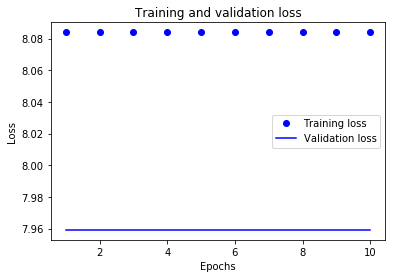

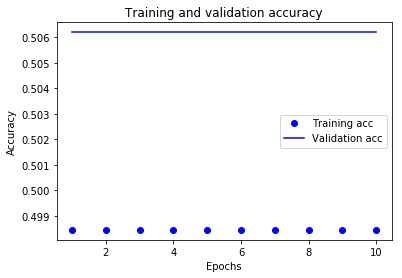

25000/25000 [==============================] - 78s 3ms/step

Test loss: 8.0590
Test accuracy: 0.5000
******************************************************************************



In [97]:
if __name__ == '__main__':

    welcome ()
    
    def main():

        # Initialize and load data
        IMDBModels = IMDBDeepModels()
        IMDBModels.load_data()
        
        IMDBModels.DNNmodel1()
        IMDBModels.DNNmodel2()
        IMDBModels.RNNmodel()
        IMDBModels.LSTMmodel()
        IMDBModels.Conv1Dmodel()
       
        return IMDBModels

    main()